# Projeto Santander - Satisfação do Cliente (Formação Cientista de DadosProjeto com Feedback 3)

A satisfação do cliente é uma medida fundamentaldesucesso. Clientes insatisfeitos cancelam seus serviços e raramente expressam sua insatisfação antes de sair.Clientes satisfeitos, por outro lado, se tornam defensores da marca! O Banco Santander está pedindo para ajudá-los a identificar clientes insatisfeitos no início do relacionamento.Isso permitiria que o Santander adotasse medidas proativas para melhorar a felicidade de um cliente antes que seja tarde demais.Neste projeto de aprendizado de máquina, você trabalhará com centenas de recursos anônimos para prever se um cliente está satisfeito ou insatisfeito com sua experiência bancária.Defina claramente o problema de negócio, faça a coleta e preparo dos dados, escolha um algoritmo, treine o modelo e avalie aacurácia, que deve ser de pelo menos 70%.Para este projeto, recomendamos a utilização da linguagem Python e o dataset disponível no Kaggle em: https://www.kaggle.com/c/santander-customer-satisfaction


In [2]:
#Biblioteca do projeto
import pandas as pd
import numpy as np

In [3]:
#Dataset para o projeto:
teste = pd.read_csv('test.csv')
treino= pd.read_csv('train.csv')

# Análise dos Dados e Preparar os Dados

In [5]:
treino.head(10) #visualização dos dados

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
5,13,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,87975.750000,0
6,14,2,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,94956.660000,0
7,18,2,26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,251638.950000,0
8,20,2,45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101962.020000,0
9,23,2,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,356463.060000,0


In [6]:
treino.shape

(76020, 371)

In [7]:
treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [8]:
# Distribuação de classes
treino['TARGET'].value_counts()

0    73012
1     3008
Name: TARGET, dtype: int64

In [9]:
def missing_values(df):
    missing = df.isnull().sum()
    
    percente = 100 * df.isnull().sum() / len(df)
    
    missing_table = pd.concat([missing,percente], axis = 1)
   
    
    missing_coluna = missing_table.rename(
        columns =  {0:'Missing Values',1: '% of total Values'})
    
             
    missing_coluna = missing_coluna[missing_coluna.iloc[:,1] != 0].sort_values(
        '% of total Values', ascending = False).round(1)
    
       
    print("Seu dataframe tem " + str(df.shape[1])+ ' colunas.\n' 
          'Há ' + str(missing_coluna.shape[0])+ 
          ' colunas que tem valores ausentes.')
    
    return missing_coluna
    
    

In [10]:
missing_values(treino)

Seu dataframe tem 371 colunas.
Há 0 colunas que tem valores ausentes.


,Missing Values,% of total Values


In [11]:
import seaborn as sns

0    73012
1     3008
Name: TARGET, dtype: int64

 Classe 1 representa 3.96% da Target


 Classe 0 representa 96.04% da Target



C:\Users\emidi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TARGET', ylabel='count'>

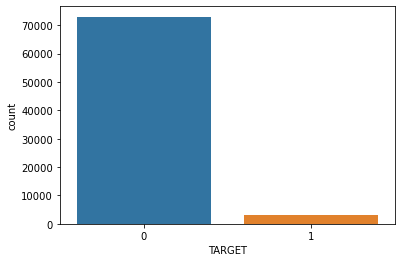

In [12]:
print(treino['TARGET'].value_counts() )

print('\n Classe 1 representa {:.2f}% da Target\n'. format ((treino[treino.TARGET == 1].shape[0]/ treino.shape[0])*100))
print ('\n Classe 0 representa {:.2f}% da Target\n'. format ((treino[treino.TARGET == 0].shape[0]/ treino.shape[0])*100))
sns.countplot('TARGET', data= treino)

In [13]:
from imblearn.under_sampling import RandomUnderSampler

In [14]:
import scikitplot as skplt

C:\Users\emidi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\emidi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\emidi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in l

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9604    1.0000    0.9798     18253
           1     0.0000    0.0000    0.0000       752

    accuracy                         0.9604     19005
   macro avg     0.4802    0.5000    0.4899     19005
weighted avg     0.9224    0.9604    0.9410     19005

Acurácia: 0.9604

AUC: 0.5000



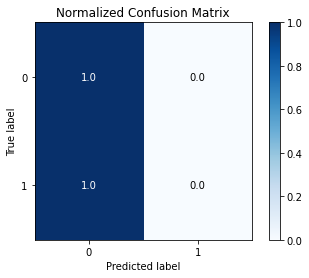

In [15]:
# Aplicação do modelo sem nem um tratamento 

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score


X = treino.drop('TARGET', axis=1)

y = treino['TARGET']
 
# dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True)
 
# instanciar e treinar um modelo de Regressão Logística
model = LogisticRegression()
model.fit(X_train, y_train)
 
# fazer as previsões em cima dos dados de teste
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)
 
# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
 
# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits=4))
 
# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred)))
 
# imprimir a área sob a curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

In [17]:
from sklearn.metrics import confusion_matrix
conf_matriz = confusion_matrix(y_true= y_test, y_pred= y_pred) 
print ("Confusion Matrix :\n",conf_matriz)

Confusion Matrix :
 [[18253     0]
 [  752     0]]


# Balancear o Dataset

Random under-sampling:
0    3008
1    3008
Name: TARGET, dtype: int64


<AxesSubplot:title={'center':'Count (target)'}>

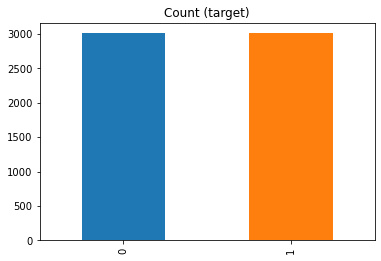

In [18]:
count_class_0,count_class_1 = treino['TARGET'].value_counts()

df_class_0 = treino[treino['TARGET']==0] # Divide as classe 0-1
df_class_1 = treino[treino['TARGET']==1]

df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under,df_class_1],axis=0)

print('Random under-sampling:')
print(df_test_under['TARGET'].value_counts())
df_test_under['TARGET'].value_counts().plot(kind ='bar', title= 'Count (target)',color = ['#1F77B4','#FF7F0E'])

# Normalização

In [19]:
dados = df_test_under

In [20]:
dados.shape

(6016, 371)

In [21]:
x1 = dados.drop('TARGET', axis=1)
y1 = dados['TARGET']

In [25]:
from sklearn.preprocessing import MinMaxScaler
escala = MinMaxScaler(feature_range= (0,1))
escala_x = escala.fit_transform(escala_x)

In [27]:
escala_x.shape

(6016, 370)

# Modelo Preditvo

In [28]:
escala_x_train, escala_x_tes, y1_train, y1_test = train_test_split(escala_x, y1, stratify=y1, shuffle=True)

In [29]:
model = LogisticRegression()
model.fit(escala_x_train, y1_train)

C:\Users\emidi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
y1_pred = model.predict(escala_x_tes)

<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

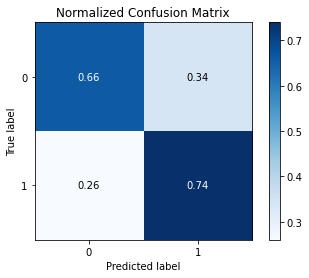

In [31]:
skplt.metrics.plot_confusion_matrix(y1_test, y1_pred, normalize=True)

In [32]:
print("Acurácia: {:.4f}\n".format(accuracy_score(y1_test, y1_pred)))

Acurácia: 0.7035

